y.size <class 'numpy.ndarray'>
out tensor([0.9826, 0.9777, 0.9769, 0.9750, 0.9823, 0.9867, 0.9771, 0.9812, 0.9707,
        0.9784, 0.9859, 0.9792, 0.9766, 0.9702, 0.9894, 0.9902, 0.9867, 0.9826,
        0.9882, 0.9841, 0.9846, 0.9836, 0.9784, 0.9815, 0.9792, 0.9788, 0.9812,
        0.9835, 0.9830, 0.9769, 0.9773, 0.9846, 0.9862, 0.9884, 0.9784, 0.9800,
        0.9857, 0.9814, 0.9716, 0.9821, 0.9817, 0.9667, 0.9732, 0.9817, 0.9841,
        0.9766, 0.9841, 0.9757, 0.9852, 0.9806, 0.9926, 0.9900, 0.9920, 0.9795,
        0.9893, 0.9840, 0.9898, 0.9734, 0.9901, 0.9790, 0.9714, 0.9864, 0.9835,
        0.9873, 0.9837, 0.9911, 0.9842, 0.9843, 0.9851, 0.9817, 0.9872, 0.9869,
        0.9870, 0.9869, 0.9890, 0.9904, 0.9907, 0.9908, 0.9866, 0.9830, 0.9801,
        0.9801, 0.9843, 0.9858, 0.9826, 0.9885, 0.9911, 0.9862, 0.9842, 0.9807,
        0.9813, 0.9877, 0.9839, 0.9739, 0.9827, 0.9850, 0.9845, 0.9879, 0.9766,
        0.9840, 0.9898, 0.9843, 0.9925, 0.9885, 0.9899, 0.9941, 0.9741, 0.9930,
     

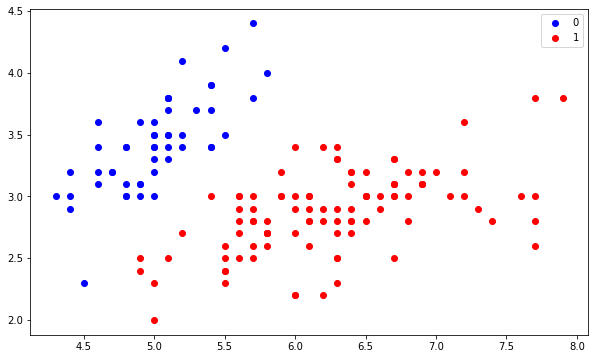

In [3]:
from sklearn import datasets
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch


# 引入数据
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
print('y.size', type(y))
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();


# 定义模型
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.lr = nn.Linear(2, 1)
        self.sm = nn.Sigmoid()
        
    def forward(self, x):
        x = self.lr(x)
        x = self.sm(x)
        x = x.squeeze()
        return x

logistic_model = LogisticRegression()

# 定义损失函数
mLoss = nn.BCELoss()
# 定义优化函数
optimizer = torch.optim.SGD(logistic_model.parameters(), lr = 1e-3, momentum = 0.9)
# 训练模型
num_epoch = 1
for epoch in range(num_epoch):
    x_data = torch.from_numpy(X).float()
    y_data = torch.from_numpy(y).float()
#     print('x_data.type', type(x_data))
#     print('x_data', x_data)
    
    out = logistic_model(x_data)
#     print('out.shape', out.shape)
#     print('x_data.shape', x_data.shape)
    
#     print('out.type', type(out))
#     print('y_data.type', type(y_data))
    
    loss = mLoss(out, y_data)
    print_loss = loss.data.item()
    ge = out.ge(0.5)
    print('out', out)
    print('ge shape', ge.shape)
    print('ge', ge)
    mask = ge.float()
    correct = (mask == y_data).sum()
    acc = correct.item()/x_data.size(0)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
#     if (epoch + 1) % 20 == 0:
#         print('*' * 10)
#         print('epoch {}'.format(epoch+1))
#         print('loss is {:.4f}'.format(print_loss))
#         print('acc is {:.4f}'.format(acc))



# 可视化结果
def looklook():
    w0, w1 = logistic_model.lr.weight[0]
    w0 = float(w0.item())
    w1 = float(w1.item())
    b = float(logistic_model.lr.bias.item())
    plot_x = np.arange(4.5, 8.0, 0.1)
    plot_y = (-w0 * plot_x - b) / w1
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')

    # plt.scatter(X.data.numpy()[:, 0], X.data.numpy()[:,1], c = y.data.numpy(), s=100, lw=0, cmap='RdY1Gn')
    plt.plot(plot_x, plot_y)
    plt.show()





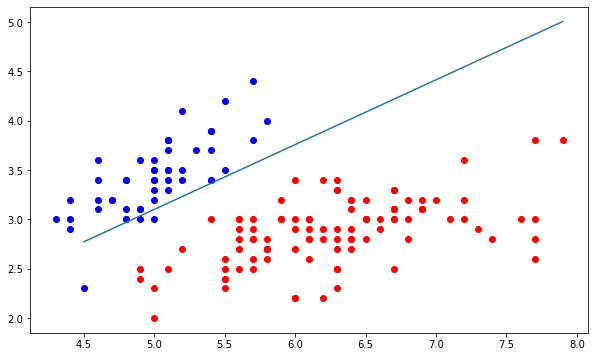

In [13]:
looklook()